# OASIS INFOBYTE

### DATA SCIENCE

### TASK 1 IRIS FLOWER CLASSIFICATION

In [21]:
import pandas as pd

In [22]:
from sklearn.datasets import load_iris

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#model
from sklearn.svm import LinearSVC

In [25]:
from sklearn.metrics import accuracy_score


In [26]:
import matplotlib.pyplot as plt
import seaborn as s

In [27]:
iris = load_iris()

### reading datasets

In [28]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [29]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [31]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### data imputation

In [32]:
df.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
species              False
dtype: bool

### exploratory data analysis

In [33]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

### different species

In [34]:
df['species'].unique()

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [35]:
df.species.nunique()

3

In [36]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

<AxesSubplot:>

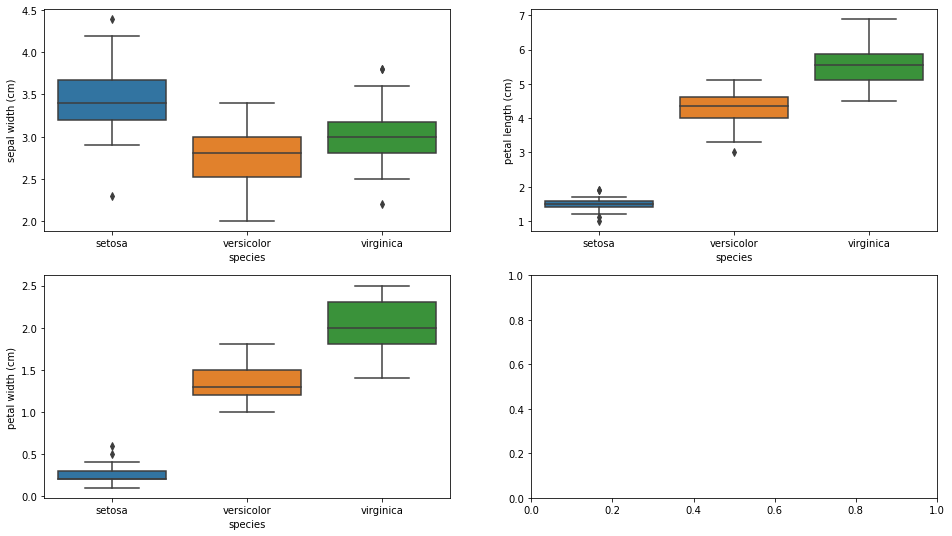

In [37]:
plt.figure(figsize=(16,9))
s.boxplot(x='species',y='sepal length (cm)',data=df)
plt.subplot(2,2,1)
s.boxplot(x='species',y='sepal width (cm)',data=df)
plt.subplot(2,2,2)
s.boxplot(x='species',y='petal length (cm)',data=df)
plt.subplot(2,2,3)
s.boxplot(x='species',y='petal width (cm)',data=df)
plt.subplot(2,2,4)

In [38]:
array = df.values    
X = array[:,0:4]    
Y = array[:,4]      
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=0)    

In [39]:
X[:][0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2]], dtype=object)

In [40]:
#instance 
svmmodel=LinearSVC()
#model fitting
svmmodel.fit(x_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [41]:
y_pred = svmmodel.predict(x_test)
svcacc =accuracy_score(y_pred, y_test) * 100
print("accuracy:",svcacc)

accuracy: 93.33333333333333
